In [1]:
import ember
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ember.create_vectorized_features("/home/clement/machineLearning/ember2018/")
# ember.create_metadata("/home/clement/machineLearning/ember2018/")
# first two lines only need to run one time, after that data is stored
X_train, y_train, X_test, y_test = ember.read_vectorized_features("/home/clement/machineLearning/ember2018/")
metadata_dataframe = ember.read_metadata("/home/clement/machineLearning/ember2018/")

In [3]:
df = pd.DataFrame(X_train)
df['label'] = y_train

# Basic dataset information

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,label
0,0.014676,0.004222,0.003923,0.004029,0.004007,0.003775,0.003825,0.003887,0.004153,0.003804,...,35240.0,0.0,0.0,660.0,32768.0,0.0,0.0,0.0,0.0,0.0
1,0.184524,0.031308,0.005693,0.005959,0.008144,0.003512,0.005786,0.008550,0.009141,0.001791,...,92936.0,408.0,608.0,2604.0,4096.0,224.0,442296.0,0.0,0.0,0.0
2,0.251737,0.014205,0.006841,0.008556,0.023493,0.002858,0.003401,0.008556,0.010215,0.001176,...,0.0,0.0,0.0,1120.0,4096.0,192.0,37280.0,0.0,0.0,0.0
3,0.008964,0.004055,0.003925,0.003936,0.004037,0.003878,0.003847,0.003946,0.003939,0.003834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020401,0.005213,0.004519,0.004097,0.004240,0.004029,0.003785,0.004593,0.004875,0.003780,...,0.0,0.0,0.0,520.0,4096.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 2382 entries, 0 to label
dtypes: float32(2382)
memory usage: 7.1 GB


### Dataset Overview

The dataset has several thousand samples, and each one has more than 2,300 float features.
All columns are numeric and there are no missing values in this subset.
Because the dataset is very high-dimensional, it may need some preprocessing before training a model.  

In [9]:
# df.describe()
# crashes IDE.... trying with just a few samples
sample_size = 5000
df = pd.DataFrame(X_train[:sample_size])
df['label'] = y_train[:sample_size]

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5.000000e+03,5000.00000,5000.000000,5000.0
mean,0.278220,0.012240,0.006477,0.005395,0.009886,0.003776,0.003683,0.002988,0.006738,0.002396,...,7.527209e+04,11.399200,67.419197,559.514404,2.051083e+05,9.78780,4.715627e+04,7.60320,2059.563965,0.0
std,0.187488,0.011144,0.009145,0.009475,0.022500,0.010242,0.006441,0.003687,0.005026,0.002247,...,1.094402e+06,43.415977,191.028809,1033.402466,3.190201e+06,76.52697,4.263696e+05,22.12961,25604.060547,0.0
min,0.003454,0.000085,0.000084,0.000038,0.000120,0.000000,0.000000,0.000000,0.000000,0.000014,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.00000,0.000000,0.0
25%,0.152108,0.006213,0.003714,0.002911,0.004207,0.001757,0.001705,0.001404,0.003530,0.001231,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.00000,0.000000,0.0
50%,0.242549,0.010207,0.004866,0.004166,0.007055,0.003209,0.002863,0.002685,0.005848,0.001953,...,0.000000e+00,0.000000,0.000000,296.000000,8.192000e+03,0.00000,0.000000e+00,0.00000,0.000000,0.0
75%,0.401149,0.014438,0.007048,0.005959,0.010095,0.004006,0.003893,0.003850,0.009683,0.003323,...,0.000000e+00,0.000000,0.000000,704.000000,6.144000e+04,0.00000,0.000000e+00,0.00000,0.000000,0.0
max,0.940918,0.326468,0.424863,0.228516,0.386876,0.270634,0.233758,0.169272,0.100266,0.049860,...,7.252442e+07,432.000000,872.000000,30652.000000,2.090855e+08,2406.00000,1.324880e+07,72.00000,842232.000000,0.0


### Statistical Summary

First, I want to emphasize that df.describe() makes my IDE crash even after multiple tries, probably because the data is way too big. This is why I chose to use 5000 samples to reduce calculations.
From the summary, I can see that some features are very spread out with a high standard deviation, while others stay much closer to their mean.
Most values are between 0 and 1 because the features in EMBER are already normalized during the vectorization process.


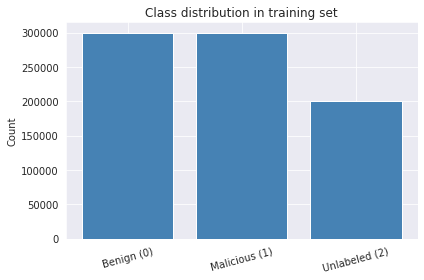

In [10]:
y_train_vis = np.where(y_train < 0, 2, y_train.astype(int))

# --- Compute class distribution ---
class_labels = ['Benign (0)', 'Malicious (1)', 'Unlabeled (2)']
class_counts = np.bincount(y_train_vis, minlength=3)

# --- Plot ---
plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color='steelblue')
plt.title("Class distribution in training set")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Class distribution

This plot shows the distribution of the three classes in the training set: benign (0), malicious (1), and unlabeled (2).
Benign and malicious samples have almost the same amount, which means the dataset is fairly balanced between these two important classes.

Unlabeled class is much smaller but it won't be used since it doesn't help our model.

# Deeper analysis based on a few samples

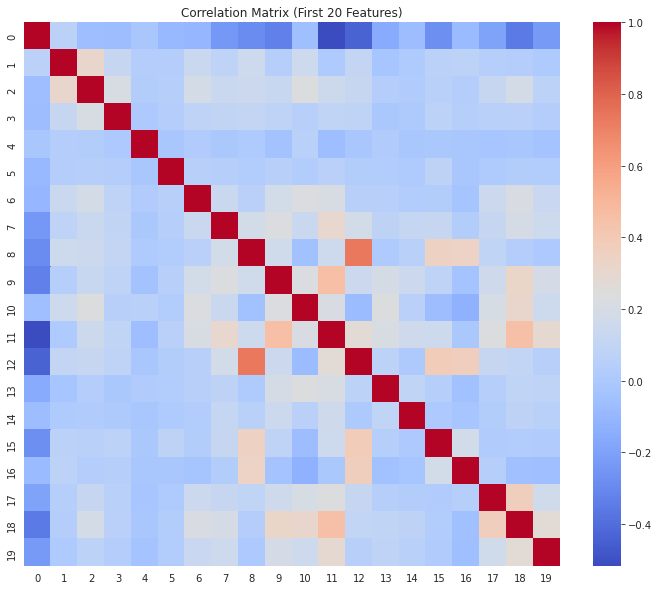

In [11]:
subset = df.iloc[:, :20]   # first 20 features

plt.figure(figsize=(12, 10))
sns.heatmap(subset.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix (First 20 Features)")
plt.show()

### Variables correlation

As I was expecting, correlation between columns is not very high for most of them. However, there are a few intersting cases like (12,8) which have ~0.5 correlation so this may be used in the future

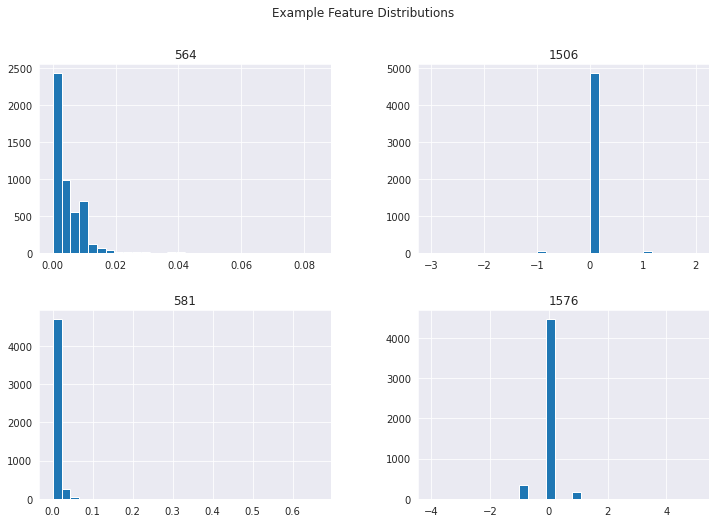

In [12]:
random_features = np.random.choice(df.columns[:-1], size=4, replace=False)  # 4 random feature columns

df[random_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Example Feature Distributions")
plt.show()

<Figure size 864x432 with 0 Axes>

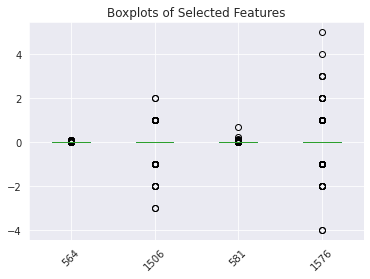

In [13]:
plt.figure(figsize=(12, 6))
df[random_features].plot(kind='box')
plt.title("Boxplots of Selected Features")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Total memory usage
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"DataFrame memory usage: {mem_mb:.2f} MB")

DataFrame memory usage: 45.43 MB
